### **Linear Regression (선형 회귀)**

*Independent variable 독립 변수 (원인) = 입력 변수, feature*<br>
*Dependent variable 종속 변수 (결과) = 출력 변수, target, label*

*최적의 직선? - 실제 값과 예측 값 차이의 **제곱의** 합을 최소화*

#### **공부 시간에 따른 시험 점수**

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
# 데이터 불러오기
dataset = pd.read_csv('LinearRegressionData.csv')

In [6]:
dataset.head()

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14
3,2.4,26
4,2.6,22


In [7]:
X = dataset.iloc[:, :-1].values # 처음부터 마지막 열 직전까지의 데이터 (독립 변수 - 원인)
Y = dataset.iloc[:, -1].values # 마지막 열 데이터 (종속 변수 - 결과)

In [8]:
X, Y

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
         68,  72,  58,  76,  86,  90, 100], dtype=int64))

In [9]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression() # 객체 생성
reg.fit(X, Y) # 학습 (모델 생성)

LinearRegression()

In [10]:
Y_pred = reg.predict(X) # X에 대한 예측 값
Y_pred

array([  5.00336377,  12.31395163,  18.58016979,  24.84638795,
        26.93512734,  33.20134551,  40.51193337,  45.73378184,
        46.77815153,  52.        ,  55.13310908,  60.35495755,
        62.44369694,  63.48806663,  64.53243633,  71.84302419,
        74.97613327,  87.5085696 ,  89.59730899, 104.2184847 ])

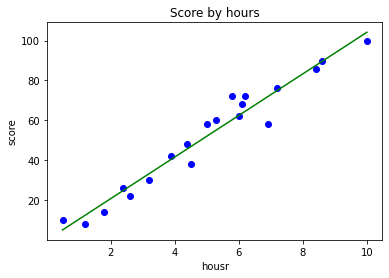

In [11]:
plt.scatter(X, Y, color = 'blue') # 산점도
plt.plot(X, Y_pred, color = 'green') # 선 그래프
plt.title('Score by hours') # 제목
plt.xlabel('housr') # X축 이름
plt.ylabel('score') # Y축 이름
plt.show()

In [12]:
print('9시간 공부했을 때 예상 점수 : ', reg.predict([[9]])) # [[9], [8], [7]]

9시간 공부했을 때 예상 점수 :  [93.77478776]


In [13]:
reg.coef_ # 기울기 (m)

array([10.44369694])

In [14]:
reg.intercept_ # y 절편 (b)

-0.218484702867201

In [15]:
# y = mx + b -> y = 10.4436x - 0.2184

#### **데이터 세트 분리**

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

In [16]:
# 데이터 불러오기
dataset = pd.read_csv('LinearRegressionData.csv')
dataset

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14
3,2.4,26
4,2.6,22
5,3.2,30
6,3.9,42
7,4.4,48
8,4.5,38
9,5.0,58


In [17]:
X = dataset.iloc[:,:-1].values
Y = dataset.iloc[:,-1].values

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0) # 훈련 80 : 테스트 20 으로 분리

In [19]:
X, len(X) # 전체 데이터 X, 개수

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 20)

In [20]:
X_train, len(X_train) # 훈련 세트 X, 개수

(array([[5.3],
        [8.4],
        [3.9],
        [6.1],
        [2.6],
        [1.8],
        [3.2],
        [6.2],
        [5. ],
        [4.4],
        [7.2],
        [5.8],
        [2.4],
        [0.5],
        [6.9],
        [6. ]]),
 16)

In [21]:
X_test, len(X_test) # 테스트 세트 X, 개수

(array([[ 8.6],
        [ 1.2],
        [10. ],
        [ 4.5]]),
 4)

In [22]:
Y, len(Y)  # 전체 데이터 Y, 개수

(array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
         68,  72,  58,  76,  86,  90, 100], dtype=int64),
 20)

In [23]:
Y_train, len(Y_train)  # 훈련 세트 Y, 개수

(array([60, 86, 42, 68, 22, 14, 30, 72, 58, 48, 76, 72, 26, 10, 58, 62],
       dtype=int64),
 16)

In [25]:
Y_test, len(Y_test)  # 테스트 세트 Y, 개수

(array([ 90,   8, 100,  38], dtype=int64), 4)

#### **분리된 데이터를 통한 모델링**

In [26]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [27]:
reg.fit(X_train, Y_train) # 훈련 세트로 학습

LinearRegression()

#### **데이터 시각화 (훈련 세트)**

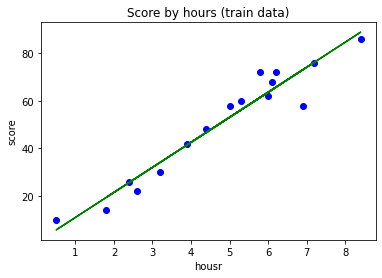

In [28]:
plt.scatter(X_train, Y_train, color='blue')  # 산점도
plt.plot(X_train, reg.predict(X_train), color='green')  # 선 그래프
plt.title('Score by hours (train data)')  # 제목
plt.xlabel('housr')  # X축 이름
plt.ylabel('score')  # Y축 이름
plt.show()

#### **데이터 시각화 (테스트 세트)**

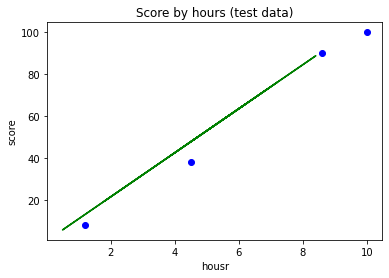

In [29]:
plt.scatter(X_test, Y_test, color='blue')  # 산점도
plt.plot(X_train, reg.predict(X_train), color='green')  # 선 그래프
plt.title('Score by hours (test data)')  # 제목
plt.xlabel('housr')  # X축 이름
plt.ylabel('score')  # Y축 이름
plt.show()

In [30]:
reg.coef_

array([10.49161294])

In [31]:
reg.intercept_

0.6115562905169369

#### **모델 평가**

In [32]:
reg.score(X_test, Y_test) # 테스트 세트를 통한 모델 평가

0.9727616474310156

In [33]:
reg.score(X_train, Y_train)  # 훈련 세트를 통한 모델 평가

0.9356663661221668

#### **경사 하강법 (Gradient Descent)**

*max_iter : 훈련 세트 반복 횟수 (Epoch 횟수)*<br>
*eta0 : 학습률 (learning rate)*

In [51]:
from sklearn.linear_model import SGDRegressor # SGD : Stochastic Gradient Descent 확률적 경사 하강법

# 지수표기법
# 1e-3 : 0.001 (10^-3)
# 1e-3 : 0.0001 (10^-4)
# 1e+3 : 1000 (10^3)
# 1e+4 : 10000 (10^4)

# sr = SGDRegressor(max_iter=200, eta0=1e-4, random_state=0, verbose=1)
sr = SGDRegressor()
sr.fit(X_train, Y_train)

SGDRegressor()

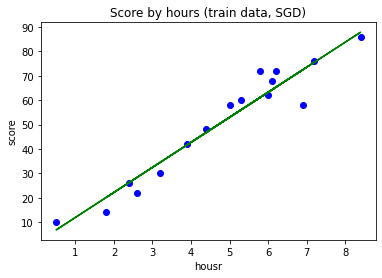

In [52]:
plt.scatter(X_train, Y_train, color='blue')  # 산점도
plt.plot(X_train, sr.predict(X_train), color='green')  # 선 그래프
plt.title('Score by hours (train data, SGD)')  # 제목
plt.xlabel('housr')  # X축 이름
plt.ylabel('score')  # Y축 이름
plt.show()

In [39]:
sr.coef_, sr.intercept_

(array([10.17533791]), array([1.58648323]))

In [37]:
sr.score(X_test, Y_test) # 테스트 세트를 통한 모델 평가

0.9765167484669195

In [38]:
sr.score(X_train, Y_train) # 훈련 세트를 통한 모델 평가

0.9342956146541629